# Assignment 1

## 1. Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import re

from matplotlib.pyplot import figure
import plotly as py

from datetime import date

from sklearn.preprocessing import OneHotEncoder

from sklearn.cluster import KMeans

import plotly.graph_objs as go

## 2. Loading the Data set

In [2]:
df = pd.read_csv('out2.csv')

In [3]:
#setting display Options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## 3. EDA and Data Wrangling

### 3.1 Understanding The Data

In [4]:
df.shape

(162, 17)

We have 162 rows and 18 columns

In [5]:
#Checking the first 5 rows of the Dataframe
df.head()

Unnamed: 0                                              Title       Price  \
0           0  2017 Ford Escape SE SE 4WD Heated Seats Backup...  $20,898.00   
1           1  2021 Jeep Wrangler | Unlimited Sahara | Clean ...  $54,887.00   
2           2  2020 Toyota Corolla LE | Heated Seats | Back-u...  $26,498.00   
3           3  2018 Volkswagen Atlas Highline 3.6L with 8sp 4...  $42,999.00   
4           4  2018 Mercedes-Benz E-Class E400 4MATIC, NAV, 3...  $57,800.00   

                                    Location  \
0           Markham / York Region 18/10/2022   
1       Mississauga / Peel Region 18/10/2022   
2  Provincial Top Ad:  Guelph < 16 hours ago   
3       Mississauga / Peel Region 14/10/2022   
4                 City of Toronto 15/10/2022   

                                         Description Condition    year  \
0  Clean Carfax SE 4WD Heated Seats Backup Camera...      Used  2017.0   
1  | Unlimited Sahara | Clean Carfax | Navigation...      Used  2021.0   
2  *Heated Seats, Blind Spot Detection, Lane Keep...      Used  2020.0   
3  2018 Atlas Highline 4Motion finished in Deep B...      Used  2018.0   
4  2018 MERCEDES BENZ E400 4MATIC COUPE | AWD | 3...      Used  2018.0   

            Make     Model                                               Trim  \
0           Ford    Escape                                                 SE   
1           Jeep  Wrangler   | Unlimited Sahara | Clean Carfax | Navigation |   
2         Toyota   Corolla                 LE | Heated Seats | Back-up Camera   
3     Volkswagen     Atlas                     Highline 3.6L with 8sp 4MOTION   
4  Mercedes-Benz   E-Class  E400 4MATIC, NAV, 360 CAM, BURMESTER, HEATED S...   

    Color       Body Type  Number of Doors  Number of Seats  \
0   White  SUV, Crossover              4.0              5.0   
1  Silver     Convertible              4.0              5.0   
2   White           Sedan              4.0              5.0   
3   Black  SUV, Crossover              4.0              6.0   
4   White  Coupe (2 door)              2.0              4.0   

               Drive Train Transmission  Mileage  
0                    4 x 4    Automatic  132,380  
1                    4 x 4    Automatic   28,000  
2  Front-wheel drive (FWD)    Automatic   75,661  
3    All-wheel drive (AWD)    Automatic   60,169  
4    All-wheel drive (AWD)    Automatic   59,349

In [6]:
#Checking the last 5 rows of the Dataframe
df.tail()

Unnamed: 0                                              Title  \
157         157  2017 Toyota 4Runner SR5 Navigation /Sunroof /L...   
158         158  2021 RAM 1500 Big Horn | CREW | ALPINE AUDIO |...   
159         159  2014 Volkswagen Jetta Comfortline 1.8T 6sp at ...   
160         160                  2012 Acura TL 4dr Sdn Auto SH-AWD   
161         161  2019 Land Rover Range Rover Sport HSE TD6 | DI...   

                      Price                                    Location  \
157              $37,995.00            City of Toronto < 37 minutes ago   
158  $47,950.00\n$50,498.00   Oakville / Halton Region < 38 minutes ago   
159               $9,800.00  Mississauga / Peel Region < 38 minutes ago   
160               $7,500.00  Mississauga / Peel Region < 39 minutes ago   
161              $73,910.00  Mississauga / Peel Region < 40 minutes ago   

                                           Description Condition    year  \
157  ***FREE 2 YR POWERTRAIN WARRANTY WITH EVERY VE...      Used  2017.0   
158  Fairview Chrysler Dodge Limited is a family ow...      Used  2021.0   
159  Over 1000 Positive Google Reviews combined!!! ...      Used  2014.0   
160  Anti-Lock Brakes;Driver Air Bag;Fog Lights;Pas...      Used  2012.0   
161  Navigation, GPS, Navi, Bluetooth, Panoramic Su...       NaN     NaN   

           Make    Model                                     Trim   Color  \
157      Toyota  4Runner  SR5 Navigation /Sunroof /Leather /7Pass  Silver   
158         Ram     1500                                 Big Horn  Silver   
159  Volkswagen    Jetta           Comfortline 1.8T 6sp at w/ Tip   Other   
160       Acura       TL                      4dr Sdn Auto SH-AWD   Other   
161         NaN      NaN                                      NaN     NaN   

          Body Type  Number of Doors  Number of Seats            Drive Train  \
157  SUV, Crossover              NaN              NaN                  4 x 4   
158           Other              NaN              NaN                  4 x 4   
159           Sedan              NaN              NaN                  Other   
160           Sedan              NaN              NaN  All-wheel drive (AWD)   
161             NaN              NaN              NaN                    NaN   

    Transmission  Mileage  
157    Automatic  149,000  
158    Automatic   33,344  
159    Automatic  222,000  
160    Automatic  253,116  
161          NaN      NaN

In [7]:
df

Unnamed: 0                                              Title  \
0             0  2017 Ford Escape SE SE 4WD Heated Seats Backup...   
1             1  2021 Jeep Wrangler | Unlimited Sahara | Clean ...   
2             2  2020 Toyota Corolla LE | Heated Seats | Back-u...   
3             3  2018 Volkswagen Atlas Highline 3.6L with 8sp 4...   
4             4  2018 Mercedes-Benz E-Class E400 4MATIC, NAV, 3...   
5             5                                 2017 Nissan Murano   
6             6  2020 Land Rover Range Rover Evoque First Editi...   
7             7  2019 Honda Passport EX-L *** Excellent conditi...   
8             8                              2020 Toyota Sienna LE   
9             9  2018 Ram 1500 | Longhorn | Clean Carfax | One ...   
10           10  2018 Subaru Forester 2.5L TOURING PKG AUT0 AWD...   
11           11                            2019 Audi TT 45 Quattro   
12           12                             2021 GMC SIERRA 2500HD   
13           13          2021 Nissan Maxima SL | Leather | Sunroof   
14           14  2016 Nissan Murano SV AWD SAFETY FEATURES, BAC...   
15           15                             2022 Ram 1500 BIG HORN   
16           16  2018 Subaru Outback TOURING W/TECH PKG AUT0 AW...   
17           17       2020 Chevrolet Express Cargo Van WT - 4G LTE   
18           18  Mercedes Benz Convertible CLK-430-2002 Soft To...   
19           19  2018 Subaru Forester 2.5L CONVENIENCE PKG AUT0...   
20           20  2019 Chevrolet Cruze LT ONE OWNER | NO ACCIDEN...   
21           21  2008 Porsche 911 Carrera Cabriolet, 320HP, MAN...   
22           22                        2017 Hyundai Santa Fe Sport   
23           23                    2019 Volkswagen Golf SportWagen   
24           24                           2018 Lincoln MKC Reserve   
25           25  2013 Ford Econoline E-250 - Power Options - Sh...   
26           26  2019 Volkswagen Golf SportWagen AWD | LOW KM |...   
27           27                2014 Toyota Matrix 4dr Wgn Auto FWD   
28           28             2020 GMC Terrain Denali AWD 4dr Denali   
29           29  2018 BMW 430i xDrive Gran Coupe M PACKAGE | GR...   
30           30  2022 RAM 1500 Classic Express 4x4 Crew Cab 5'7...   
31           31  2019 Subaru Outback 3.6R Premier w-EyeSight Pk...   
32           32  2019 Mercedes-Benz GLA 45 AMG I PANO I NAVI I ...   
33           33  2006 Porsche Cayman S I 6-SPEED I BOSE I COMIN...   
34           34  2018 BMW M4 RED LEATHER I CARBON FIBRE I COMIN...   
35           35  2017 Chevrolet Corvette STINGRAY I 6-SPEED I C...   
36           36  2015 GMC Savana G3500 - 16Ft Box - V8 Gasoline...   
37           37  2018 BMW 5 Series 530i xDrive I M-SPORT I HUD ...   
38           38                                    2016 Subaru BRZ   
39           39  2016 Mercedes-Benz CLA-Class CLA 250 AWD Navig...   
40           40                             2010 Nissan Sentra 2.0   
41           41  2019 Mitsubishi Mirage GT COME EXPERIENCE THE ...   
42           42  2018 Ram Promaster 2500 159WB HighRoof - V6Gas...   
43           43         2013 Ford F-350 XLT Crew Cab Short Box 4WD   
44           44                               2019 Honda Ridgeline   
45           45         2022 Ford F-150 XLT 4WD SUPERCREW 5.5' BOX   
46           46              2008 Chevrolet Uplander 4dr Reg WB LS   
47           47  2019 Ram Promaster 2500 159WB High Roof - V6 G...   
48           48  2019 Volkswagen Golf GTI Autobahn Auto Sunroof...   
49           49  2014 Mazda CX-5 GS/ AWD / SUNROOF / PUSH START...   
50           50  2021 Ram Promaster 2500 159WB High Roof - V6 G...   
51           51  2022 Tesla Model 3 Standard Range RWD No Accid...   
52           52  2016 Ford Transit T-250 148WB Mid Roof - 3.7L ...   
53           53  2018 GMC Terrain SLE Diesel - Navigation - Sun...   
54           54                              2006 Nissan MURANO SL   
55           55   2022 Toyota RAV4 Hybrid SE | Toyota Safety Sense   
56           56

In [8]:
#Checking the Data types
df.dtypes

Unnamed: 0           int64
Title               object
Price               object
Location            object
Description         object
Condition           object
year               float64
Make                object
Model               object
Trim                object
Color               object
Body Type           object
Number of Doors    float64
Number of Seats    float64
Drive Train         object
Transmission        object
Mileage             object
dtype: object

We have,

1 Integer Column

3 float Columns 

13 Object Columns

Todo : Convert Price, Mileage to float or Integer values

Also we need to Drop the Unnamed: 0 column which is a replica of Automatic Index column

In [9]:
#Dropping the Unnamed: 0 
df.drop('Unnamed: 0',axis = 1,inplace=True)

In [10]:
# Getting first price if two were given
df['Price'] = df['Price'].map(lambda x: x.split('\n',1)[0])

In [11]:
#  Converting Price column to required string format
df['Price'] = df['Price'].map(lambda x: re.sub(r'[^\d.]', '',x))
#Converting Price column to required string format
df['Price'] = df['Price'].map(lambda x: float(x) if not x == '' else 0)

In [12]:
#Converting Mileage column to required string format
df['Mileage'] = df['Mileage'].apply(lambda x: float(re.sub(r'[^\d.]', '',x)) if not pd.isnull(x) else np.nan)

In [13]:
df.dtypes

Title               object
Price              float64
Location            object
Description         object
Condition           object
year               float64
Make                object
Model               object
Trim                object
Color               object
Body Type           object
Number of Doors    float64
Number of Seats    float64
Drive Train         object
Transmission        object
Mileage            float64
dtype: object

### 3.2 Summary Statistics

In [14]:
df.describe()

Price         year  Number of Doors  Number of Seats  \
count     162.000000   158.000000       105.000000       103.000000   
mean    38861.709877  2015.822785         3.419048         4.601942   
std     54112.870882     5.181445         0.927994         1.345580   
min         0.000000  1990.000000         2.000000         2.000000   
25%     15821.250000  2014.000000         2.000000         4.000000   
50%     26944.000000  2017.500000         4.000000         5.000000   
75%     46888.000000  2019.000000         4.000000         5.000000   
max    499800.000000  2022.000000         5.000000         8.000000   

             Mileage  
count     153.000000  
mean   107617.084967  
std     68682.971082  
min        42.000000  
25%     47469.000000  
50%    107000.000000  
75%    162200.000000  
max    311094.000000

### 3.3 Unique Values

In this section we will be intuitively selecting categorical features to continue data Analysis and encoding

In [15]:
#Checking unique values of categorical columns
df.select_dtypes(include=['object']).nunique()

Title           123
Location        122
Description     124
Condition         2
Make             27
Model            83
Trim            108
Color             9
Body Type         9
Drive Train       5
Transmission      3
dtype: int64

Since columns 'Title' , 'Location', 'Description', 'Make', 'Model','Trim' has considerably high number of unique values, encoding these columns would result in a higher dimention of the dataset hence we have decided to exclude these columns for proceedings

In [16]:
#Dropping 
cols = ['Title' , 'Location', 'Description', 'Make', 'Model','Trim']
df.drop(columns=cols,inplace=True)

### 3.4 Checking for Missing Values and Imputation

In [17]:
#Checking for null value percentage with respect to total entries
round(df.isnull().mean()*100,0)

Price               0.0
Condition           2.0
year                2.0
Color               4.0
Body Type           2.0
Number of Doors    35.0
Number of Seats    36.0
Drive Train         4.0
Transmission        4.0
Mileage             6.0
dtype: float64

To Do : Number of Doors and Number of Seats have significant percentages of null values hence we will drop these columns for the initial model. Other columns have less than 10% hence we will impute with mean value of the respective columns

In [18]:
# Dropping 'Number of Doors' and 'Number of Seats'
df.drop(columns=['Number of Doors','Number of Seats'],inplace=True)

In [19]:
df.dtypes

Price           float64
Condition        object
year            float64
Color            object
Body Type        object
Drive Train      object
Transmission     object
Mileage         float64
dtype: object

In [20]:
#Replacing NaN values with Mean / Median for Numerical Columns
df['Price'].replace(0,df['Price'].mean(), inplace=True)
df['Mileage'].fillna(int(df['Mileage'].mean()), inplace=True)
df['year'].fillna(df['year'].mean(), inplace=True)

In [21]:
#Replacing NaN values with Mode for categorical Columns
df['Condition'].fillna(df['Condition'].value_counts().index[0], inplace=True)
df['Color'].fillna(df['Color'].value_counts().index[0], inplace=True)
df['Body Type'].fillna(df['Body Type'].value_counts().index[0], inplace=True)
df['Drive Train'].fillna(df['Drive Train'].value_counts().index[0], inplace=True)
df['Transmission'].fillna(df['Transmission'].value_counts().index[0], inplace=True)

In [22]:
round(df.isnull().mean()*100,0)

Price           0.0
Condition       0.0
year            0.0
Color           0.0
Body Type       0.0
Drive Train     0.0
Transmission    0.0
Mileage         0.0
dtype: float64

In [23]:
#df_clean = df.select_dtypes(include=['object']).apply(lambda x: x.fillna(x.value_counts().index[0]))

### 3.5 Feature Engineering

Inorder to get an intuitive meaning out of the column 'Year' , we can find out how old the vehicle is by 
substracting the model year from current year. This new feature will be added as 'Age'

In [24]:
current_year = date.today().year
df['Age'] = current_year - df['year']

## 4. Plotting

In [25]:
df.dtypes

Price           float64
Condition        object
year            float64
Color            object
Body Type        object
Drive Train      object
Transmission     object
Mileage         float64
Age             float64
dtype: object

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

### 4.1 Numerical Columns

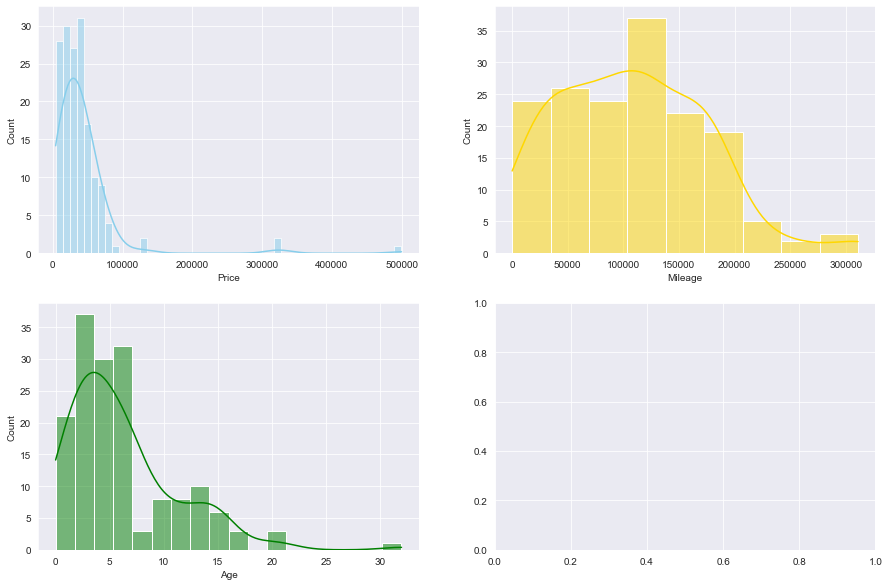

In [27]:
#Histograms

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(data=df, x="Price", kde=True, color="skyblue", ax=axs[0,0])
sns.histplot(data=df, x="Mileage", kde=True, color="gold", ax=axs[0,1])
sns.histplot(data=df, x="Age", kde=True, color="Green", ax=axs[1,0])

plt.show()

Observations:

1. Price has a right skewed distribution

2. Mileage has a uniform distribution

3. Age has a right skewed distribution

Todo:
Log transform 'Price' column for skewness reduction. Log Transformation for 'Year' will not be proceeded as it
will change the discretness of the feature hence making us to transform the input for prediction as well. 

Status : Done

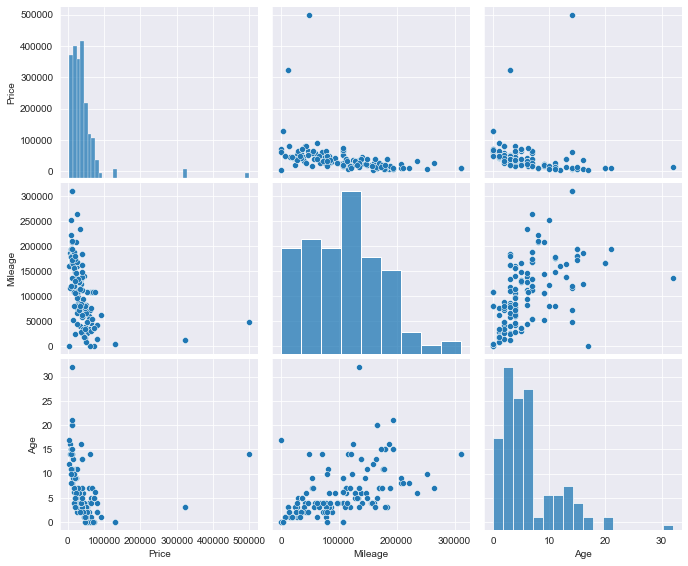

In [28]:
# Pair Plot
g = sns.pairplot(df.drop(columns='year'))
g.fig.set_size_inches(10,8)

Observations:

There seems to be no correlation between mileage and price where even through price increases majority of Mileage 
values remain to be same.
However, the Mileage and Age seems to have a positive correlation.

### 4.2 Categorical Columns

<AxesSubplot:xlabel='Transmission', ylabel='count'>

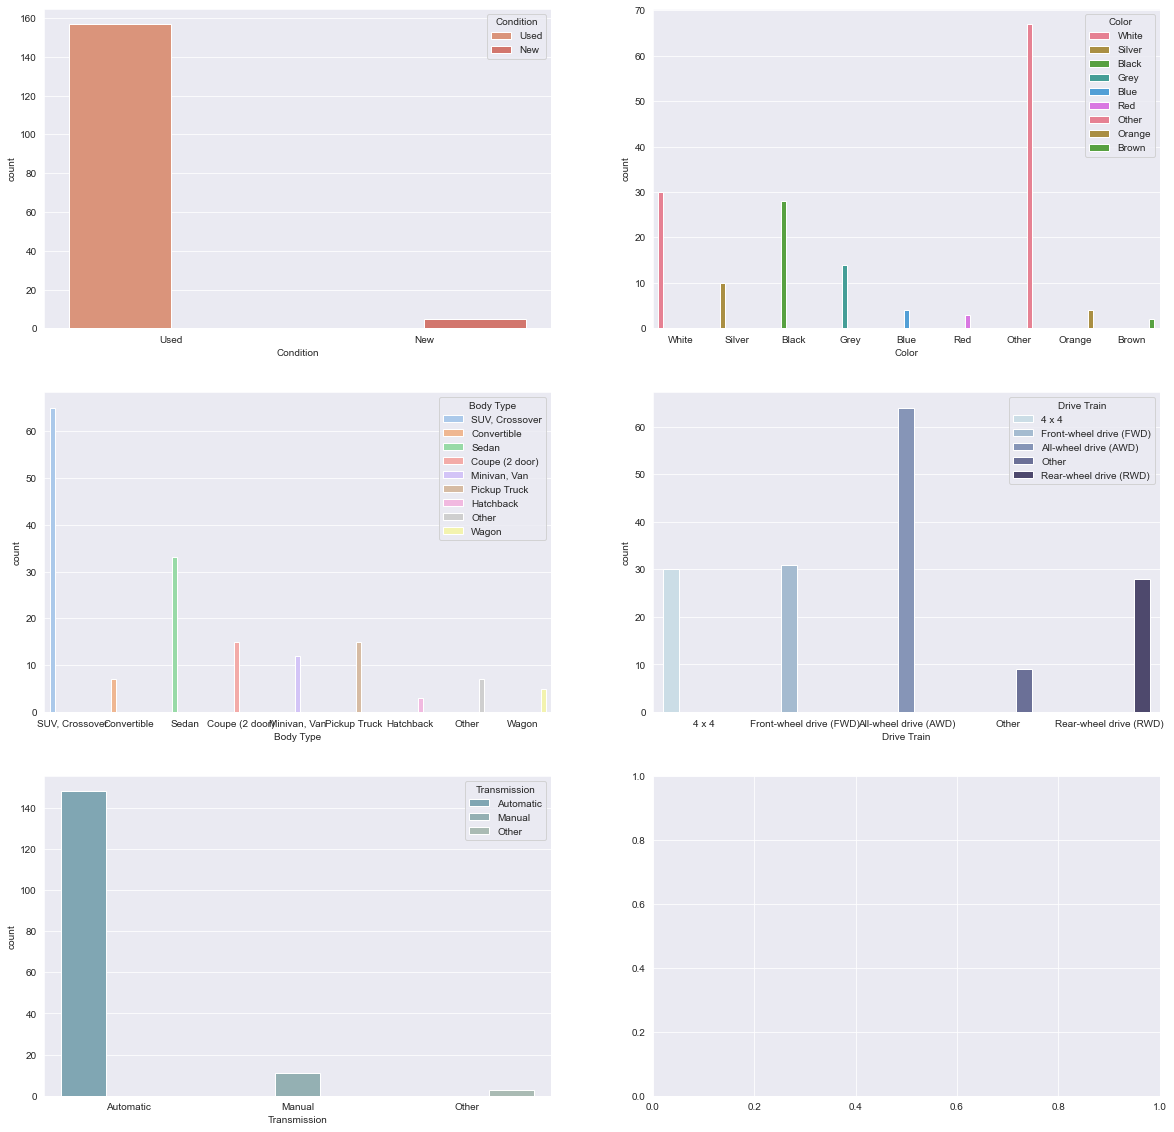

In [29]:
#Countplots
fig, axs = plt.subplots(3, 2, figsize=(20, 20))

sns.countplot(x=df['Condition'], ax=axs[0,0],palette=sns.color_palette("flare"),hue=df['Condition'])
sns.countplot(x=df['Color'], ax=axs[0,1],palette=sns.color_palette("husl"),hue=df['Color'])
sns.countplot(x=df['Body Type'], ax=axs[1,0],palette=sns.color_palette("pastel"),hue=df['Body Type'])
sns.countplot(x=df['Drive Train'], ax=axs[1,1],palette=sns.color_palette("ch:s=.25,rot=-.25"),hue=df['Drive Train'])
sns.countplot(x=df['Transmission'],ax=axs[2,0],palette=sns.color_palette("blend:#7AB,#EDA"),hue=df['Transmission'])

Observations: 

1. 'Condition' seems to be containing more values of 'Used' category compared to 'New'. 
2. 'Transmission' seems to be containing more values of 'Automatic' category compared to 'Manual'


## 5. Pandas Profiling

In [30]:
from pandas_profiling import ProfileReport

In [31]:
#Creating pandas profile
profile = ProfileReport(df, title="Pandas Profiling Report")

In [32]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [33]:
#Exporting Created Profile to HTML format
profile.to_file("Pandas_Profiling_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## 6. Outlier Detection and Removal

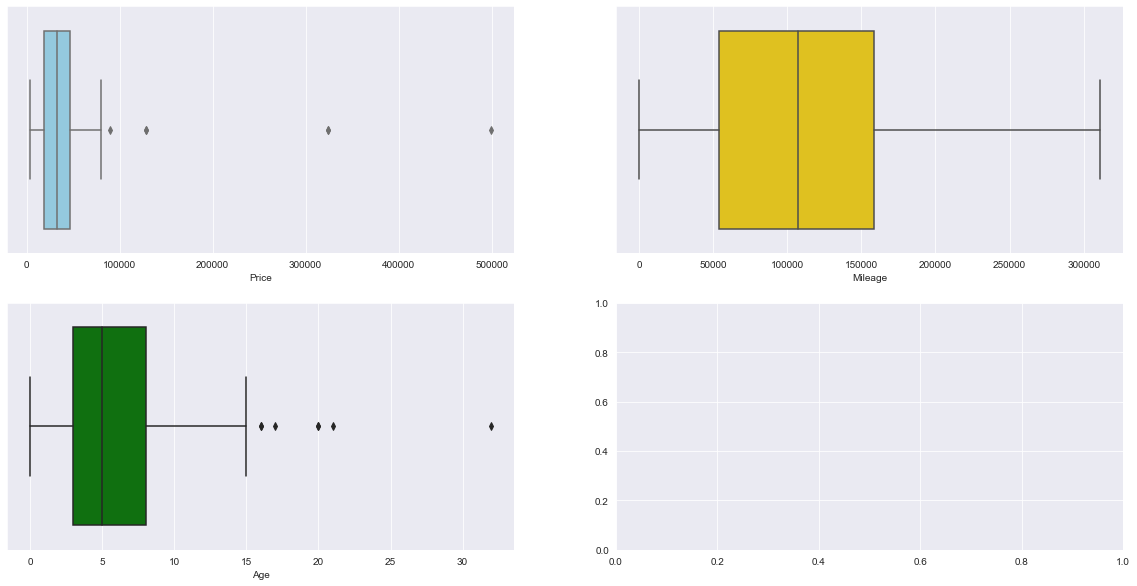

In [34]:
#Boxplots
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

sns.boxplot(data=df, x="Price",  color="skyblue", ax=axs[0,0])
sns.boxplot(data=df, x="Mileage", color="gold", ax=axs[0,1])
sns.boxplot(data=df, x="Age", color="Green", ax=axs[1,0])

plt.show()

Observations:

1. 'Price' and 'Age' seems to have ourliers (data points out of whiskers) 


### 6.1 Log Transforming

For the skewed values, we will perform log transformation to remove the skewness

In [35]:
df['Price_logarithm'] = np.log2(df['Price'])

<AxesSubplot:xlabel='Price_logarithm', ylabel='Count'>

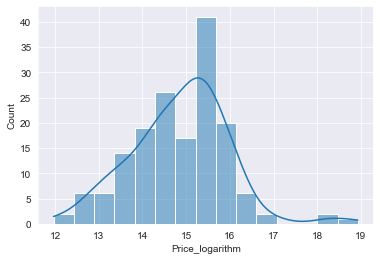

In [36]:
sns.histplot(data=df['Price_logarithm'],kde=True)

### 6.2 Trimming

In [37]:
#Finding the upperbound to Trim Price
q1 = df['Price'].quantile(0.25)
q3 = df['Price'].quantile(0.75)
iqr = q3-q1

upper_wisker_price = q3+(1.5*iqr)

print('Shape before Trimming: ',df.shape)

index = df[(df['Price'])>upper_wisker_price].index
print('Shape After Trimming: ',df.drop(index=index).shape)

Shape before Trimming:  (162, 10)
Shape After Trimming:  (156, 10)


In [38]:
#Finding the upperbound to Trim Age
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3-q1

upper_wisker_age = q3+(1.5*iqr)

print('Shape before Trimming: ',df.shape)

index = df[(df['Age'])>upper_wisker_age].index
print('Shape After Trimming: ',df.drop(index=index).shape)

Shape before Trimming:  (162, 10)
Shape After Trimming:  (155, 10)


### 6.3 Quantile based flooring and capping

##### 6.3.1 'Price'

In [39]:
q1 = df['Price'].quantile(0.25)
q3 = df['Price'].quantile(0.75)
iqr = q3-q1

lower_wisker = q1-(1.5*iqr)
upper_wisker = q3+(1.5*iqr)

In [40]:
print(f"Q1: {q1:,}")
print(f"Q3: {q3:,}")
print(f"IQR: {iqr:,}")
print(f"Lower Wisker: {lower_wisker:,}")
print(f"upper Wisker: {upper_wisker:,}")

Q1: 18,885.0
Q3: 46,888.0
IQR: 28,003.0
Lower Wisker: -23,119.5
upper Wisker: 88,892.5


Since there are no outliers behind the lower wisker, we will only be considering the upper wisker

In [41]:
upperCap = df['Price'].quantile(0.90)
df['Price'] = np.where(df['Price']>upperCap,upperCap,df['Price'])

<AxesSubplot:xlabel='Price'>

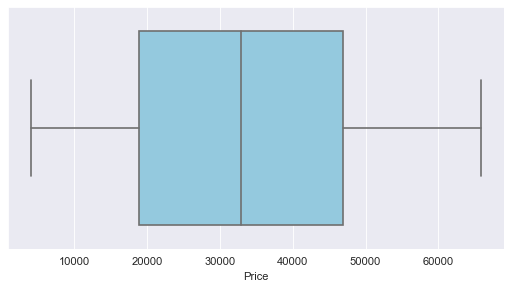

In [42]:
figure(figsize=(8, 4), dpi=80)
sns.boxplot(data=df, x="Price",color="skyblue")

##### 6.2.3 'Age'

In [43]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3-q1

lower_wisker = q1-(1.5*iqr)
upper_wisker = q3+(1.5*iqr)

In [44]:
print(f"Q1: {q1:,}")
print(f"Q3: {q3:,}")
print(f"IQR: {iqr:,}")
print(f"Lower Wisker: {lower_wisker:,}")
print(f"upper Wisker: {upper_wisker:,}")

Q1: 3.0
Q3: 8.0
IQR: 5.0
Lower Wisker: -4.5
upper Wisker: 15.5


Since there are no outliers behind the lower wisker, we will only be considering the upper wisker

In [45]:
upperCap = df['Age'].quantile(0.90)
df['Age'] = np.where(df['Age']>upperCap,upperCap,df['Age'])

<AxesSubplot:xlabel='Age'>

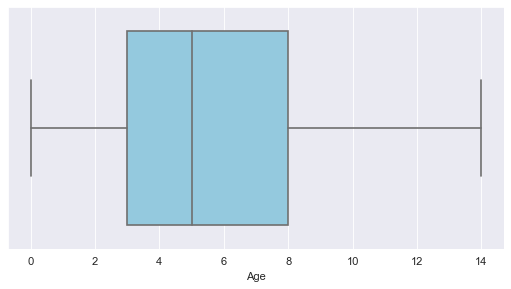

In [46]:
figure(figsize=(8, 4), dpi=80)
sns.boxplot(data=df, x="Age",color="skyblue")

## 7. Encoding

In [47]:
df.dtypes

Price              float64
Condition           object
year               float64
Color               object
Body Type           object
Drive Train         object
Transmission        object
Mileage            float64
Age                float64
Price_logarithm    float64
dtype: object

In [48]:
#Categorical Data
df.select_dtypes(include=['object']).nunique()

Condition       2
Color           9
Body Type       9
Drive Train     5
Transmission    3
dtype: int64

In [49]:
# 1.Binary Encoding for 'Condition' as it has only 2 unique instances
df['Condition'] = df['Condition'].map(lambda x:0 if x=='Used' else 1)

In [50]:
# 2. Onehot Encoding for other categorical Columns

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

# Encoding the 'Color' Column
encoder_df = pd.DataFrame(encoder.fit_transform(df[['Color']]).toarray())
encoder_df.columns = df['Color'].unique()
joined_df = df.join(encoder_df)

In [51]:
joined_df

Price  Condition         year   Color       Body Type  \
0    20898.000000          0  2017.000000   White  SUV, Crossover   
1    54887.000000          0  2021.000000  Silver     Convertible   
2    26498.000000          0  2020.000000   White           Sedan   
3    42999.000000          0  2018.000000   Black  SUV, Crossover   
4    57800.000000          0  2018.000000   White  Coupe (2 door)   
5    24025.000000          0  2017.000000   Black  SUV, Crossover   
6    58800.000000          0  2020.000000    Grey  SUV, Crossover   
7    38480.000000          0  2019.000000   White  SUV, Crossover   
8    38995.000000          0  2020.000000    Blue    Minivan, Van   
9    44758.000000          0  2018.000000     Red    Pickup Truck   
10   22990.000000          0  2018.000000   Other  SUV, Crossover   
11   52990.000000          0  2019.000000   White       Hatchback   
12   65910.000000          0  2021.000000   Other           Other   
13   43395.000000          0  2021.000000     Red           Sedan   
14   22673.000000          0  2016.000000   White  SUV, Crossover   
15   61898.000000          1  2022.000000   Black    Pickup Truck   
16   25500.000000          0  2018.000000   Other  SUV, Crossover   
17   49995.000000          0  2020.000000   White    Minivan, Van   
18   11500.000000          0  2002.000000    Blue     Convertible   
19   20850.000000          0  2018.000000   Other  SUV, Crossover   
20   18955.000000          0  2019.000000   Other           Other   
21   59800.000000          0  2008.000000   Black     Convertible   
22   23800.000000          0  2017.000000    Grey  SUV, Crossover   
23   28888.000000          0  2019.000000   White           Wagon   
24   24680.000000          0  2018.000000   Other  SUV, Crossover   
25   21888.000000          0  2013.000000   Other    Minivan, Van   
26   24980.000000          0  2019.000000   Other           Wagon   
27   10770.000000          0  2014.000000     Red           Wagon   
28   45888.000000          0  2020.000000   Other  SUV, Crossover   
29   32950.000000          0  2018.000000   White           Sedan   
30   51998.000000          1  2022.000000   Other    Pickup Truck   
31   39585.000000          0  2019.000000   Other           Wagon   
32   49910.000000          0  2019.000000   Other  SUV, Crossover   
33   34910.000000          0  2006.000000   Other  Coupe (2 door)   
34   65910.000000          0  2018.000000   Other           Sedan   
35   62910.000000          0  2017.000000   Other  Coupe (2 door)   
36   25888.000000          0  2015.000000   Other    Minivan, Van   
37   39910.000000          0  2018.000000   Other           Sedan   
38   38861.709877          0  2016.000000   Other  Coupe (2 door)   
39   22499.000000          0  2016.000000   Black           Sedan   
40    3999.000000          0  2010.000000   Black           Sedan   
41   20990.000000          0  2019.000000    Grey           Wagon   
42   43777.000000          0  2018.000000   Other    Minivan, Van   
43   21999.000000          0  2013.000000   White    Pickup Truck   
44   34995.000000          0  2019.000000   Other           Other   
45   65370.000000          1  2022.000000   White           Other   
46    5998.000000          0  2008.000000   Other           Other   
47   48888.000000          0  2019.000000   Other    Minivan, Van   
48   33994.000000          0  2019.000000   Other    Minivan, Van   
49   11000.000000          0  2014.000000   White  SUV, Crossover   
50   63888.000000          0  2021.000000   Other    Minivan, Van   
51   65910.000000          0  2022.000000   Other           Sedan   
52   32777.000000          0  2016.000000   Other    Minivan, Van   
53   26900.000000          0  2018.000000   Other  SUV, Crossover   
54    5995.000000          0  2006.000000   Other           Other   
55   59995.000000          0  2022.000000    Grey  SUV, Crossover   
56   52888.000000          1  2022.000000   Other    Pickup Truck   
57   39995

Note : Similarly this can be performed for rest of the categorical columns, but since we will not be using it for 
clustering, we will not proceed for other columns

## 8. KNN Clustering

### 8.1 Calculating Inertia:

Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

In [52]:
df.isnull().mean()

Price              0.0
Condition          0.0
year               0.0
Color              0.0
Body Type          0.0
Drive Train        0.0
Transmission       0.0
Mileage            0.0
Age                0.0
Price_logarithm    0.0
dtype: float64

In [53]:
'''Price Log and Age '''
X1 = df[['Price_logarithm' , 'Age']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1323: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


### 8.2 Finding best number of Clusters

For this, we will be using the elbow method used which the point where the inertia starts to show low degree of
reduction, is considerd the best number of clusters

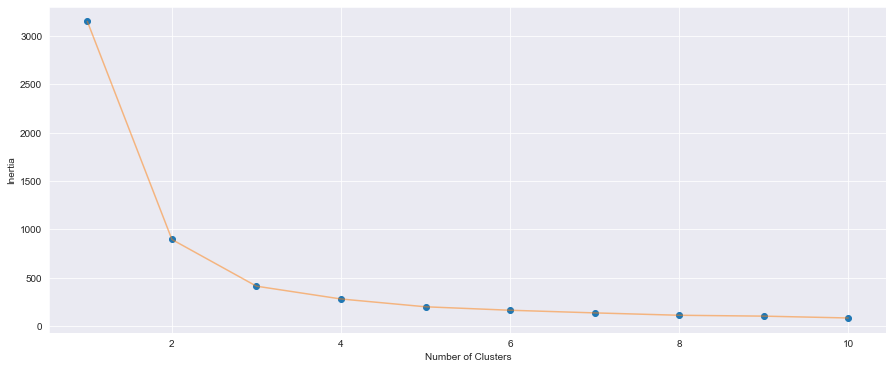

In [54]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.style.use("seaborn")
plt.show()

### 8.3 Fitting the K means Model

Text(0, 0.5, 'Age')

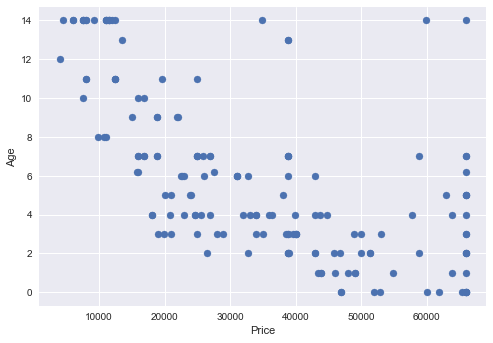

In [55]:
#Try to see whether we can see clusters with scatter plot
plt.scatter(df['Price'],df['Age'])
plt.xlabel("Price")
plt.ylabel("Age")

It is not easy to spot clusters in this manner hence we will use K means 

In [56]:
# Setting 4 as the number of clusters
km = KMeans(n_clusters=4)

In [57]:
y_predicted = km.fit_predict(df[['Price','Age']])
y_predicted

array([0, 2, 0, 1, 2, 0, 2, 1, 1, 1, 0, 1, 2, 1, 0, 2, 0, 1, 3, 0, 0, 2,
       0, 0, 0, 0, 0, 3, 1, 0, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 3, 0, 1, 0,
       1, 2, 3, 1, 1, 3, 2, 2, 0, 0, 3, 2, 1, 1, 3, 3, 0, 1, 0, 2, 1, 3,
       0, 1, 2, 1, 3, 3, 3, 0, 0, 2, 1, 1, 3, 0, 2, 1, 3, 3, 0, 3, 1, 0,
       2, 1, 1, 2, 1, 3, 1, 1, 0, 1, 2, 0, 1, 3, 3, 3, 0, 3, 0, 0, 0, 2,
       2, 0, 1, 3, 3, 2, 1, 1, 0, 1, 2, 1, 3, 3, 3, 0, 0, 2, 1, 1, 3, 0,
       2, 1, 3, 3, 0, 3, 1, 0, 2, 1, 1, 2, 1, 3, 3, 3, 1, 1, 0, 3, 0, 3,
       2, 0, 0, 1, 1, 3, 3, 2], dtype=int32)

In [58]:
#Including the clusters as a column
df['Cluster'] = y_predicted

Text(0, 0.5, 'Age')

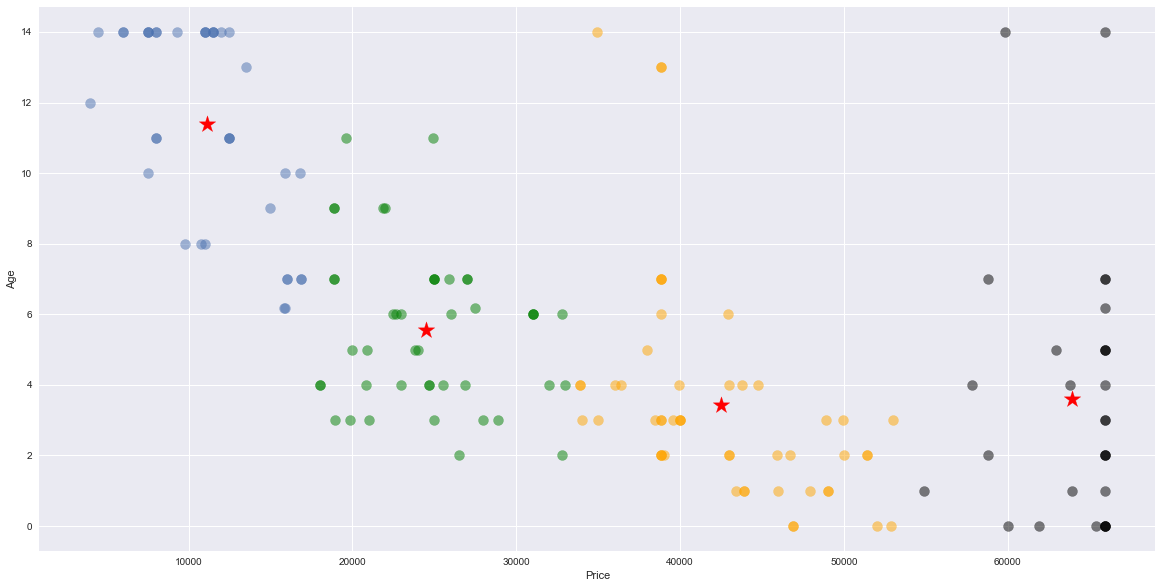

In [59]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]
df4 = df[df.Cluster==3]

plt.figure(figsize=(20, 10))
plt.style.use("seaborn")
plt.scatter(x = 'Price' , y = 'Age' ,data = df1,color = 'green',s=100,alpha = 0.5)
plt.scatter(x = 'Price' , y = 'Age' ,data = df2,color = 'orange',s=100,alpha = 0.5)
plt.scatter(x = 'Price' , y = 'Age' ,data = df3,color = 'black',s=100,alpha = 0.5)
plt.scatter(x = 'Price' , y = 'Age' ,data = df4,s=100,alpha = 0.5)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='red',marker="*",s=300)
plt.xlabel("Price")
plt.ylabel("Age")

### 8.4Plotting 3D for 3 parameters

In [60]:
X3 = df[['Price' , 'Age' ,'Mileage']].iloc[: , :].values
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [61]:
df['labels'] =  labels3
trace1 = go.Scatter3d(
    x= df['Price'],
    y= df['Age'],
    z= df['Mileage'],
    mode='markers',
     marker=dict(
        color = df['labels'], 
        size= 20,
        line=dict(
            color= df['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Price'),
            yaxis = dict(title  = 'Age'),
            zaxis = dict(title  = 'Mileage')
        )
)
fig = go.Figure(data=data, layout=layout)
fig.update_layout(
    autosize=False,
    width=800,
    height=800)
py.offline.iplot(fig)

# 9.Additions (Text data pre processing)

In [129]:
df = pd.read_csv('out2.csv')

In [130]:
df

Unnamed: 0                                              Title  \
0             0  2017 Ford Escape SE SE 4WD Heated Seats Backup...   
1             1  2021 Jeep Wrangler | Unlimited Sahara | Clean ...   
2             2  2020 Toyota Corolla LE | Heated Seats | Back-u...   
3             3  2018 Volkswagen Atlas Highline 3.6L with 8sp 4...   
4             4  2018 Mercedes-Benz E-Class E400 4MATIC, NAV, 3...   
5             5                                 2017 Nissan Murano   
6             6  2020 Land Rover Range Rover Evoque First Editi...   
7             7  2019 Honda Passport EX-L *** Excellent conditi...   
8             8                              2020 Toyota Sienna LE   
9             9  2018 Ram 1500 | Longhorn | Clean Carfax | One ...   
10           10  2018 Subaru Forester 2.5L TOURING PKG AUT0 AWD...   
11           11                            2019 Audi TT 45 Quattro   
12           12                             2021 GMC SIERRA 2500HD   
13           13          2021 Nissan Maxima SL | Leather | Sunroof   
14           14  2016 Nissan Murano SV AWD SAFETY FEATURES, BAC...   
15           15                             2022 Ram 1500 BIG HORN   
16           16  2018 Subaru Outback TOURING W/TECH PKG AUT0 AW...   
17           17       2020 Chevrolet Express Cargo Van WT - 4G LTE   
18           18  Mercedes Benz Convertible CLK-430-2002 Soft To...   
19           19  2018 Subaru Forester 2.5L CONVENIENCE PKG AUT0...   
20           20  2019 Chevrolet Cruze LT ONE OWNER | NO ACCIDEN...   
21           21  2008 Porsche 911 Carrera Cabriolet, 320HP, MAN...   
22           22                        2017 Hyundai Santa Fe Sport   
23           23                    2019 Volkswagen Golf SportWagen   
24           24                           2018 Lincoln MKC Reserve   
25           25  2013 Ford Econoline E-250 - Power Options - Sh...   
26           26  2019 Volkswagen Golf SportWagen AWD | LOW KM |...   
27           27                2014 Toyota Matrix 4dr Wgn Auto FWD   
28           28             2020 GMC Terrain Denali AWD 4dr Denali   
29           29  2018 BMW 430i xDrive Gran Coupe M PACKAGE | GR...   
30           30  2022 RAM 1500 Classic Express 4x4 Crew Cab 5'7...   
31           31  2019 Subaru Outback 3.6R Premier w-EyeSight Pk...   
32           32  2019 Mercedes-Benz GLA 45 AMG I PANO I NAVI I ...   
33           33  2006 Porsche Cayman S I 6-SPEED I BOSE I COMIN...   
34           34  2018 BMW M4 RED LEATHER I CARBON FIBRE I COMIN...   
35           35  2017 Chevrolet Corvette STINGRAY I 6-SPEED I C...   
36           36  2015 GMC Savana G3500 - 16Ft Box - V8 Gasoline...   
37           37  2018 BMW 5 Series 530i xDrive I M-SPORT I HUD ...   
38           38                                    2016 Subaru BRZ   
39           39  2016 Mercedes-Benz CLA-Class CLA 250 AWD Navig...   
40           40                             2010 Nissan Sentra 2.0   
41           41  2019 Mitsubishi Mirage GT COME EXPERIENCE THE ...   
42           42  2018 Ram Promaster 2500 159WB HighRoof - V6Gas...   
43           43         2013 Ford F-350 XLT Crew Cab Short Box 4WD   
44           44                               2019 Honda Ridgeline   
45           45         2022 Ford F-150 XLT 4WD SUPERCREW 5.5' BOX   
46           46              2008 Chevrolet Uplander 4dr Reg WB LS   
47           47  2019 Ram Promaster 2500 159WB High Roof - V6 G...   
48           48  2019 Volkswagen Golf GTI Autobahn Auto Sunroof...   
49           49  2014 Mazda CX-5 GS/ AWD / SUNROOF / PUSH START...   
50           50  2021 Ram Promaster 2500 159WB High Roof - V6 G...   
51           51  2022 Tesla Model 3 Standard Range RWD No Accid...   
52           52  2016 Ford Transit T-250 148WB Mid Roof - 3.7L ...   
53           53  2018 GMC Terrain SLE Diesel - Navigation - Sun...   
54           54                              2006 Nissan MURANO SL   
55           55   2022 Toyota RAV4 Hybrid SE | Toyota Safety Sense   
56           56

In [131]:
df1 = df[['year','Description']]
df1

year                                        Description
0    2017.0  Clean Carfax SE 4WD Heated Seats Backup Camera...
1    2021.0  | Unlimited Sahara | Clean Carfax | Navigation...
2    2020.0  *Heated Seats, Blind Spot Detection, Lane Keep...
3    2018.0  2018 Atlas Highline 4Motion finished in Deep B...
4    2018.0  2018 MERCEDES BENZ E400 4MATIC COUPE | AWD | 3...
5    2017.0  Check out this 2017 Nissan Murano while we sti...
6    2020.0  CLEAN CARFAX | P250 FIRST EDITION (R-DYNAMIC S...
7    2019.0  Drive this home for only $168.57/wk*** today!!...
8    2020.0  *Family First at Audi Windsor: Move your loved...
9    2018.0  | Longhorn | Clean Carfax | One Owner | Leathe...
10   2018.0  SUV....., AWD.........AUTO...........A/C.........
11   2019.0  CLEAN CARFAX TT 45 QUATTRO AWD 2.0L Turbo 4-Cy...
12   2021.0  THIS 2021 GMC SIERRA 2500 DENALI HAS - REMOTE ...
13   2021.0  This is a great vehicle for anyone and great f...
14   2016.0  2016 Nissan Murano SV AWD CVT with Xtronic 3.5...
15   2022.0  Sunroof, Big Horn Level 2 Equipment, Uconnect!...
16   2018.0  SUV....., AWD.........AUTO...........A/C.........
17   2020.0  4G LTE, Easy Clean Floors, Rear Vision Camera,...
18   2002.0  2002-CLK-430 w/8 Cyl.4.3 engine in good condit...
19   2018.0  SUV....., AWD.........AUTO...........A/C.........
20   2019.0  New Price! 2019 Chevrolet Cruze LT Turbo LT TU...
21   2008.0  2008 PORSCHE 911 CARRERA CABRIOLET | 3.6L 6-CY...
22   2017.0  Engine: 4 Cylinder Engine 2.4L L/100Km City: 1...
23   2019.0  Recent Arrival! White 2019 Volkswagen Golf Spo...
24   2018.0  The 2018 Lincoln MKC Reserve AWD is powered by...
25   2013.0  Just Arrived - Chrome Package - 2013 Ford Econ...
26   2019.0  This Vehicle Has 82,619 KMs, Single Owner, Loc...
27   2014.0  CLEAN CARFAX NO ACCIDENT HISTORY Engine: 1.8 L...
28   2020.0  One owner accident free in excellent condition...
29   2018.0  CANADIAN VEHICLE FROM ONTARIO CARFAX REPORT AV...
30   2022.0  This RAM 1500 Classic has a strong Regular Unl...
31   2019.0  One owner with low mileage and no accident Fea...
32   2019.0  Navigation, GPS, Navi, Bluetooth, Panoramic Su...
33   2006.0  Leather Interior, Heated Seats, Xenon Headlamp...
34   2018.0  Navigation, GPS, Navi, Bluetooth, Back-Up Came...
35   2017.0  See Dealer Website for Details.\nWINNER OF 201...
36   2015.0  Toronto's Largest Selection of CERTIFIED Pre-O...
37   2018.0  Navigation, GPS, Navi, Bluetooth, Sunroof / Mo...
38   2016.0  See Dealer Website for Details. Additional Opt...
39   2016.0  ***FREE 2 YR POWERTRAIN WARRANTY WITH EVERY VE...
40   2010.0  Vehicle has had two accidents 2013 and 2016 ru...
41   2019.0  WAS: $22990 NOW: $20990 plus taxes and licensi...
42   2018.0  Just Arrived! 15+ Promaster Vans In Stock - 20...
43   2013.0  GMM Auto Sales Limited CarFax available for ev...
44   2019.0  • Power Windows • Cruise Control • Power Lumba...
45   2022.0  Say goodbye to your current ride and say hello...
46   2008.0  Just Arrived... Only 116 Km - comes with 2 Yea...
47   2019.0  10 + Ram Promaster Cargo Vans in Inventory - J...
48   2019.0  Experience the uncompromising driving experien...
49   2014.0  CERTIFICATION AVAILABLE FOR $695 *ASKING PRICE...
50   2021.0  Just Arrived - THREE To Choose From - 2021 Ram...
51   2022.0  MAKE SURE TO VISIT US AT OUR NEW LOCATION AT 5...
52   2016.0  More Mid/High Roof Cargo Vans in Stock! Just A...
53   2018.0  Our inventory is subject to inspection for rec...
54   2006.0  This vehicle is being sold “*AS-IS*, unfit, no...
55   2022.0  The 2022 RAV4's rugged yet sophisticated exter...
56   2022.0  0% FINANCING AVAILABLE - COME SEE WHY PEOPLE B...
57   2019.0  ***FREE 2 YR POWERTRAIN WARRANTY WITH EVERY VE...
58      NaN  This *ONE OWNER* 2017 Volkswagen Jetta Trendli...
59   2002.0  2002-CLK-430 w/8 Cyl.4.3 engine in good condit...
60      NaN  This Vehicle Has 61,582 KMs, Single Owner, Loc...
61   2020.0  2020 HYUNDAI PALISADE SEL Power Sunroof / Heat...
62   2011.0  - LEATHER SEATS - HEATED 

In [132]:
df1 = pd.DataFrame([df1.groupby('year')['Description'].apply(list)])
df1 = df1.T.reset_index()

In [133]:
df1.head()

year                                        Description
0  1990.0  [Hello selling my 1990 Nissan 300zx N/A very l...
1  2001.0  [Great conversion van. 4 comfy captains chairs...
2  2002.0  [2002-CLK-430 w/8 Cyl.4.3 engine in good condi...
3  2005.0  [Hi WysIWysSelling my daily driven project tru...
4  2006.0  [Leather Interior, Heated Seats, Xenon Headlam...

### 9.1 Retain Alphanumeric only

In [134]:
import re
df1['Description'] = df1['Description'].map(lambda x: re.sub('[^a-zA-Z ]+','',str(x)))

In [135]:
df1.head()

year                                        Description
0  1990.0  Hello selling my  Nissan zx NA very low km car...
1  2001.0  Great conversion van  comfy captains chairs an...
2  2002.0  CLK w Cyl engine in good conditionno issues Re...
3  2005.0  Hi WysIWysSelling my daily driven project truc...
4  2006.0  Leather Interior Heated Seats Xenon Headlamps ...

### 9.2 Converting to Lower case

In [136]:
df1['Description'] = df1['Description'].map(lambda x: x.lower())

In [137]:
df1.head()

year                                        Description
0  1990.0  hello selling my  nissan zx na very low km car...
1  2001.0  great conversion van  comfy captains chairs an...
2  2002.0  clk w cyl engine in good conditionno issues re...
3  2005.0  hi wysiwysselling my daily driven project truc...
4  2006.0  leather interior heated seats xenon headlamps ...

### 9.3 Tokenizing

In [138]:
from nltk.tokenize import word_tokenize

In [139]:
def tokenize(x):
    return word_tokenize(x)

df1['Tokenized'] = df1['Description'].map(lambda x: tokenize(x))

In [140]:
df1.head()

year                                        Description  \
0  1990.0  hello selling my  nissan zx na very low km car...   
1  2001.0  great conversion van  comfy captains chairs an...   
2  2002.0  clk w cyl engine in good conditionno issues re...   
3  2005.0  hi wysiwysselling my daily driven project truc...   
4  2006.0  leather interior heated seats xenon headlamps ...   

                                           Tokenized  
0  [hello, selling, my, nissan, zx, na, very, low...  
1  [great, conversion, van, comfy, captains, chai...  
2  [clk, w, cyl, engine, in, good, conditionno, i...  
3  [hi, wysiwysselling, my, daily, driven, projec...  
4  [leather, interior, heated, seats, xenon, head...

### 9.4 Stopword Removal

In [141]:
from nltk.corpus import stopwords as sw

In [142]:
stopwordsEnglish = sw.words('English')
stopwordsEnglish = stopwordsEnglish + ['w','hi','v','dk','km','year']

In [143]:
def stopWrodRemoved(x):
    tempList = []
    for word in x:
        if word not in stopwordsEnglish:
            tempList.append(word)
    return tempList

df1['Stop Word Removed'] = df1['Tokenized'].map(lambda x: stopWrodRemoved(x))

In [144]:
df1.head()

year                                        Description  \
0  1990.0  hello selling my  nissan zx na very low km car...   
1  2001.0  great conversion van  comfy captains chairs an...   
2  2002.0  clk w cyl engine in good conditionno issues re...   
3  2005.0  hi wysiwysselling my daily driven project truc...   
4  2006.0  leather interior heated seats xenon headlamps ...   

                                           Tokenized  \
0  [hello, selling, my, nissan, zx, na, very, low...   
1  [great, conversion, van, comfy, captains, chai...   
2  [clk, w, cyl, engine, in, good, conditionno, i...   
3  [hi, wysiwysselling, my, daily, driven, projec...   
4  [leather, interior, heated, seats, xenon, head...   

                                   Stop Word Removed  
0  [hello, selling, nissan, zx, na, low, car, car...  
1  [great, conversion, van, comfy, captains, chai...  
2  [clk, cyl, engine, good, conditionno, issues, ...  
3  [wysiwysselling, daily, driven, project, truck...  
4  [leather, interior, heated, seats, xenon, head...

### 9.5 Lemmatization

In [145]:
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()

In [146]:
def lemmatizeWords(x):
    arrTemp = []
    for i in x:
        arrTemp.append(lem.lemmatize(i,pos='n'))

    return arrTemp

df1['Lemmatized'] = df1['Stop Word Removed'].map(lambda x: lemmatizeWords(x) )

In [147]:
df1.head()

year                                        Description  \
0  1990.0  hello selling my  nissan zx na very low km car...   
1  2001.0  great conversion van  comfy captains chairs an...   
2  2002.0  clk w cyl engine in good conditionno issues re...   
3  2005.0  hi wysiwysselling my daily driven project truc...   
4  2006.0  leather interior heated seats xenon headlamps ...   

                                           Tokenized  \
0  [hello, selling, my, nissan, zx, na, very, low...   
1  [great, conversion, van, comfy, captains, chai...   
2  [clk, w, cyl, engine, in, good, conditionno, i...   
3  [hi, wysiwysselling, my, daily, driven, projec...   
4  [leather, interior, heated, seats, xenon, head...   

                                   Stop Word Removed  \
0  [hello, selling, nissan, zx, na, low, car, car...   
1  [great, conversion, van, comfy, captains, chai...   
2  [clk, cyl, engine, good, conditionno, issues, ...   
3  [wysiwysselling, daily, driven, project, truck...   
4  [leather, interior, heated, seats, xenon, head...   

                                          Lemmatized  
0  [hello, selling, nissan, zx, na, low, car, car...  
1  [great, conversion, van, comfy, captain, chair...  
2  [clk, cyl, engine, good, conditionno, issue, r...  
3  [wysiwysselling, daily, driven, project, truck...  
4  [leather, interior, heated, seat, xenon, headl...


### 9.6 Fequent Words

In [148]:
from nltk.probability import FreqDist
fdist = FreqDist()

In [149]:
def getFreqWrod(x):
    fdist = FreqDist()
    for word in x:
        fdist[word] +=1
#     return dict(fdist.most_common(3)
    return dict(fdist.most_common(3))

df1['FDist'] = df1['Lemmatized'].map(lambda x: getFreqWrod(x))

In [150]:
df1.head()

year                                        Description  \
0  1990.0  hello selling my  nissan zx na very low km car...   
1  2001.0  great conversion van  comfy captains chairs an...   
2  2002.0  clk w cyl engine in good conditionno issues re...   
3  2005.0  hi wysiwysselling my daily driven project truc...   
4  2006.0  leather interior heated seats xenon headlamps ...   

                                           Tokenized  \
0  [hello, selling, my, nissan, zx, na, very, low...   
1  [great, conversion, van, comfy, captains, chai...   
2  [clk, w, cyl, engine, in, good, conditionno, i...   
3  [hi, wysiwysselling, my, daily, driven, projec...   
4  [leather, interior, heated, seats, xenon, head...   

                                   Stop Word Removed  \
0  [hello, selling, nissan, zx, na, low, car, car...   
1  [great, conversion, van, comfy, captains, chai...   
2  [clk, cyl, engine, good, conditionno, issues, ...   
3  [wysiwysselling, daily, driven, project, truck...   
4  [leather, interior, heated, seats, xenon, head...   

                                          Lemmatized  \
0  [hello, selling, nissan, zx, na, low, car, car...   
1  [great, conversion, van, comfy, captain, chair...   
2  [clk, cyl, engine, good, conditionno, issue, r...   
3  [wysiwysselling, daily, driven, project, truck...   
4  [leather, interior, heated, seat, xenon, headl...   

                                          FDist  
0              {'car': 3, 'new': 3, 'brake': 2}  
1       {'great': 1, 'conversion': 1, 'van': 1}  
2             {'clk': 2, 'cyl': 2, 'engine': 2}  
3  {'work': 2, 'wysiwysselling': 1, 'daily': 1}  
4       {'wheel': 2, 'window': 2, 'vehicle': 2}

In [151]:
df2 = df1[['year','FDist']]

In [152]:
df3 = pd.concat([df2.drop(['FDist'], axis=1), df2['FDist'].apply(pd.Series)], axis=1)
df3 = df3.fillna(0)

In [153]:
df3.head()

year  car  new  brake  great  conversion  van  clk  cyl  engine  work  \
0  1990.0  3.0  3.0    2.0    0.0         0.0  0.0  0.0  0.0     0.0   0.0   
1  2001.0  0.0  0.0    0.0    1.0         1.0  1.0  0.0  0.0     0.0   0.0   
2  2002.0  0.0  0.0    0.0    0.0         0.0  0.0  2.0  2.0     2.0   0.0   
3  2005.0  0.0  0.0    0.0    0.0         0.0  0.0  0.0  0.0     0.0   2.0   
4  2006.0  0.0  0.0    0.0    0.0         0.0  0.0  0.0  0.0     0.0   0.0   

   wysiwysselling  daily  wheel  window  vehicle  amg  drive  calltext  mint  \
0             0.0    0.0    0.0     0.0      0.0  0.0    0.0       0.0   0.0   
1             0.0    0.0    0.0     0.0      0.0  0.0    0.0       0.0   0.0   
2             0.0    0.0    0.0     0.0      0.0  0.0    0.0       0.0   0.0   
3             1.0    1.0    0.0     0.0      0.0  0.0    0.0       0.0   0.0   
4             0.0    0.0    2.0     2.0      2.0  0.0    0.0       0.0   0.0   

   automatic  carfax  two  accident  seat  heated  air  nautomatic  auto  \
0        0.0     0.0  0.0       0.0   0.0     0.0  0.0         0.0   0.0   
1        0.0     0.0  0.0       0.0   0.0     0.0  0.0         0.0   0.0   
2        0.0     0.0  0.0       0.0   0.0     0.0  0.0         0.0   0.0   
3        0.0     0.0  0.0       0.0   0.0     0.0  0.0         0.0   0.0   
4        0.0     0.0  0.0       0.0   0.0     0.0  0.0         0.0   0.0   

   free  filter  experience  leather  navigation  dealership  top  canada  \
0   0.0     0.0         0.0      0.0         0.0         0.0  0.0     0.0   
1   0.0     0.0         0.0      0.0         0.0         0.0  0.0     0.0   
2   0.0     0.0         0.0      0.0         0.0         0.0  0.0     0.0   
3   0.0     0.0         0.0      0.0         0.0         0.0  0.0     0.0   
4   0.0     0.0         0.0      0.0         0.0         0.0  0.0     0.0   

   report  chrysler  ram  
0     0.0       0.0  0.0  
1     0.0       0.0  0.0  
2     0.0       0.0  0.0  
3     0.0       0.0  0.0  
4     0.0       0.0  0.0

In [154]:
df3.dtypes

year              float64
car               float64
new               float64
brake             float64
great             float64
conversion        float64
van               float64
clk               float64
cyl               float64
engine            float64
work              float64
wysiwysselling    float64
daily             float64
wheel             float64
window            float64
vehicle           float64
amg               float64
drive             float64
calltext          float64
mint              float64
automatic         float64
carfax            float64
two               float64
accident          float64
seat              float64
heated            float64
air               float64
nautomatic        float64
auto              float64
free              float64
filter            float64
experience        float64
leather           float64
navigation        float64
dealership        float64
top               float64
canada            float64
report            float64
chrysler    

In [155]:
df3.shape

(21, 40)

In [157]:
# df3['year'] = df3['year'].astype(int)
# df3['year'] = df3['year'].astype(str)
df3['year']

0     1990.0
1     2001.0
2     2002.0
3     2005.0
4     2006.0
5     2007.0
6     2008.0
7     2009.0
8     2010.0
9     2011.0
10    2012.0
11    2013.0
12    2014.0
13    2015.0
14    2016.0
15    2017.0
16    2018.0
17    2019.0
18    2020.0
19    2021.0
20    2022.0
Name: year, dtype: float64

In [172]:
columList = list(df3.columns)
columList.pop(0)
columList

['car',
 'new',
 'brake',
 'great',
 'conversion',
 'van',
 'clk',
 'cyl',
 'engine',
 'work',
 'wysiwysselling',
 'daily',
 'wheel',
 'window',
 'vehicle',
 'amg',
 'drive',
 'calltext',
 'mint',
 'automatic',
 'carfax',
 'two',
 'accident',
 'seat',
 'heated',
 'air',
 'nautomatic',
 'auto',
 'free',
 'filter',
 'experience',
 'leather',
 'navigation',
 'dealership',
 'top',
 'canada',
 'report',
 'chrysler',
 'ram']

In [175]:
df3.shape[0]

21

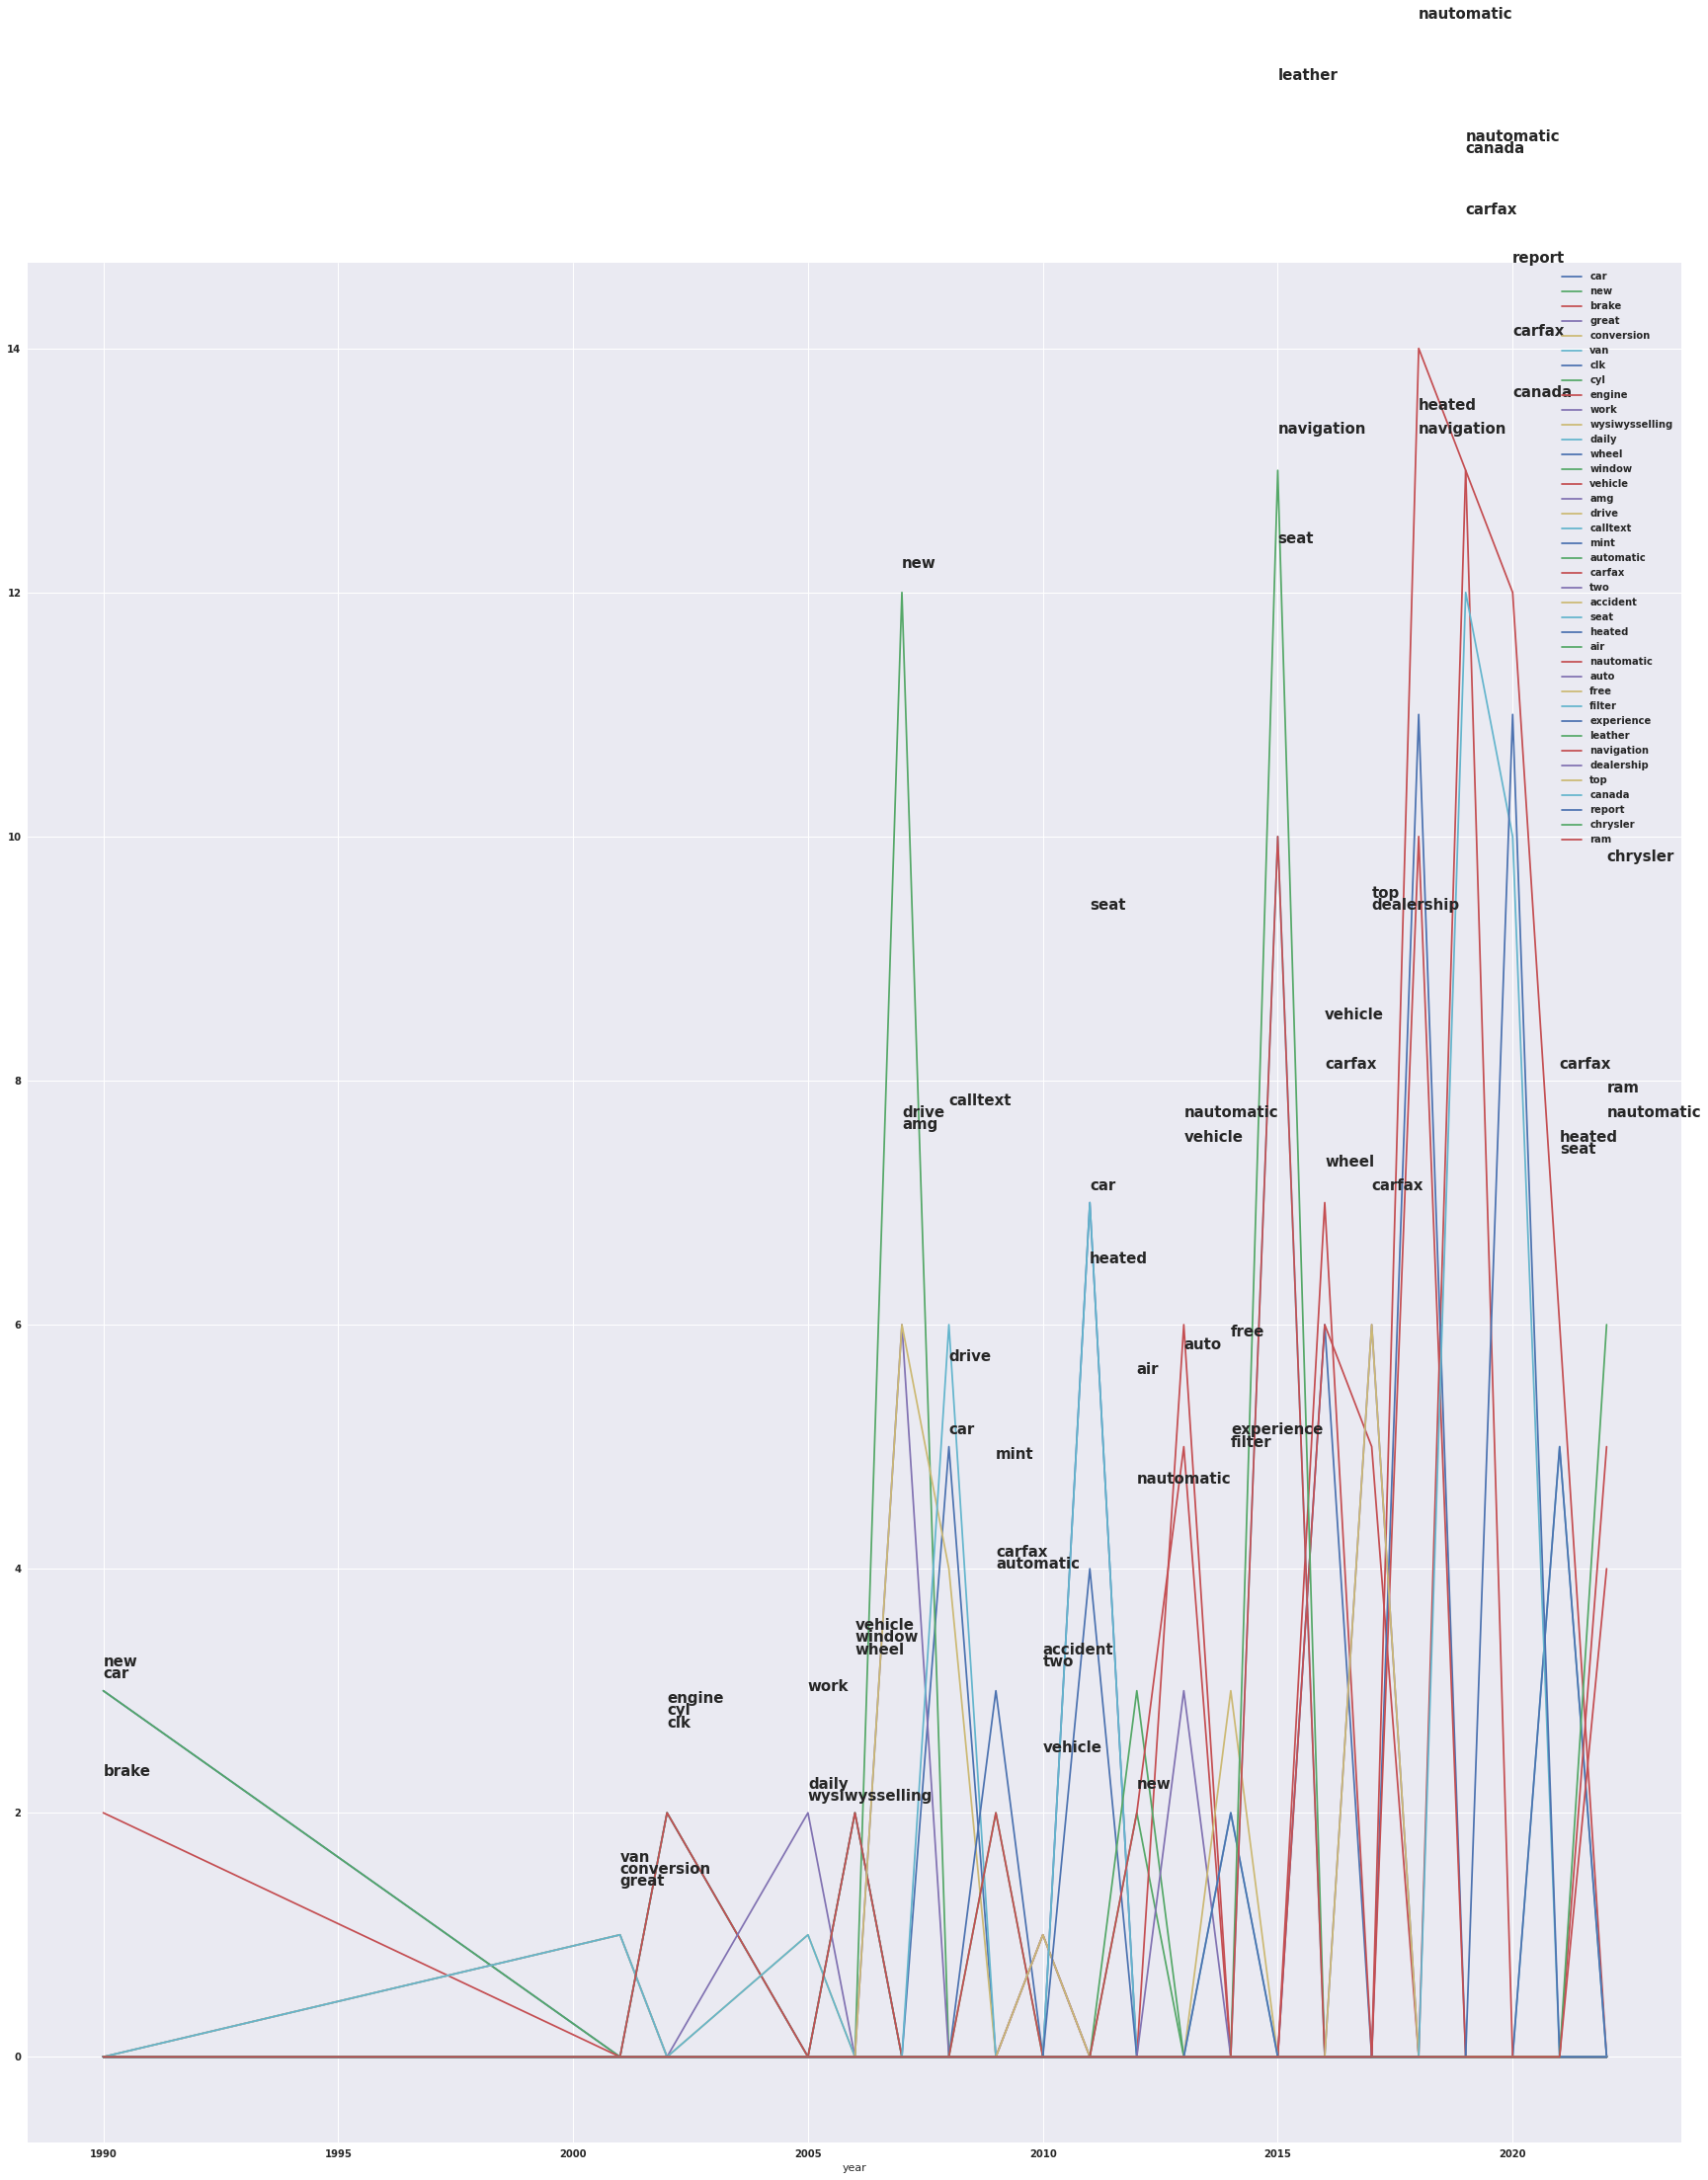

In [188]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}

plt.rc('font', **font)


plt.rcParams["figure.figsize"] = (30,35)
df3.set_index('year').plot()

yincrement = 0.1
for col in columList:
    for i in range(0,df3.shape[0]):
            if df3[col][i] > 0:
                plt.text(df3['year'][i],df3[col][i]+yincrement,col)
    yincrement+=0.1

# for j in range(1,df3.shape[1]):
#     for i in range(0,df3.shape[0]):
#         if df3.iloc[i,j] > 0:
#             plt.text(df3['year'][j],df3[i,j]+10,'h')
        

In [161]:
df3.iloc[0,1]

3.0